
## Import Libraries

In [1]:
## Install Dependencies
!pip install albumentations==0.4.6
!pip install torchsummary

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import albumentations as A
from albumentations.pytorch import ToTensorV2

import torch
from torchvision import datasets, transforms
from torchsummary import summary

In [3]:
from albumentations.pytorch import ToTensorV2

from google.colab import drive
drive.mount('/content/drive')

BASE_DIR='/content/drive/My Drive/New folder'
%cd $BASE_DIR

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/New folder


In [4]:
import main
from utils import data_handling, train, test, gradcam, helpers, augmentation
from models import resnet18

## Import Config

In [5]:
config_file_path = "config.yaml"
config = helpers.load_config_variables(config_file_path)
print(config)

 Loading config ..
 Config succesfully loaded 
{'standard_lr': 0.01, 'momentum_val': 0.9, 'L2_penalty': 1e-05, 'sch_reduceLR_mode': 'min', 'sch_reduceLR_factor': 0.1, 'sch_reduceLR_patience': 10, 'sch_reduceLR_threshold': 0.0001, 'sch_reduceLR_threshold_mode': 'abs', 'sch_reduceLR_min_lr': 0, 'sch_reduceLR_cooldown': 0, 'sch_reduceLR_eps': 1e-08, 'horizontalFlipProb': 0.2, 'shiftLimit': 0.1, 'scaleLimit': 0.1, 'shiftScaleRotateProb': 0.25, 'maxHoles': 1, 'minHoles': 1, 'maxHeight': 16, 'maxWidth': 16, 'minHeight': 16, 'minWidth': 16, 'coarseDropoutProb': 0.5, 'grayscaleProb': 0.15, 'padHeightWidth': 40, 'randomCropSize': 32, 'randomCropProb': 1, 'rotateLimit': 5}


## GPU Check

In [6]:
device, cuda = helpers.gpu_check(seed_value = 1)
device

CUDA is available


device(type='cuda')

## Data Loaders

In [7]:
mean, std = data_handling.return_dataset_statistics()
trainloader, testloader = main.create_dataloaders(mean, std, cuda, config, augment_func = "albumentation_augmentation")

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


## Model Summary

In [8]:
from torchsummary import summary
model = resnet18.ResNet18().to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

## Training

In [9]:
train_acc, train_losses, test_acc, test_losses, lrs = main.trigger_training(model, device, trainloader, testloader, config, optimizer_name = "Adam", scheduler_name = "ReduceLROnPlateau", criterion_name = "CrossEntropyLoss", lambda_l1 = 0, epochs = 20)

EPOCH: 1


Loss=1.5754945278167725 Batch_id=390 LR=0.01000 Accuracy=33.05: 100%|██████████| 391/391 [00:44<00:00,  8.86it/s]



Test set: Average loss: 0.0131, Accuracy: 4261/10000 (42.61%)

EPOCH: 2


Loss=1.4961639642715454 Batch_id=390 LR=0.01000 Accuracy=47.88: 100%|██████████| 391/391 [00:44<00:00,  8.89it/s]



Test set: Average loss: 0.0095, Accuracy: 5635/10000 (56.35%)

EPOCH: 3


Loss=1.1374207735061646 Batch_id=390 LR=0.01000 Accuracy=57.71: 100%|██████████| 391/391 [00:44<00:00,  8.76it/s]



Test set: Average loss: 0.0084, Accuracy: 6183/10000 (61.83%)

EPOCH: 4


Loss=0.9487029910087585 Batch_id=390 LR=0.01000 Accuracy=64.12: 100%|██████████| 391/391 [00:45<00:00,  8.65it/s]



Test set: Average loss: 0.0070, Accuracy: 6866/10000 (68.66%)

EPOCH: 5


Loss=0.7605847120285034 Batch_id=390 LR=0.01000 Accuracy=68.48: 100%|██████████| 391/391 [00:45<00:00,  8.60it/s]



Test set: Average loss: 0.0072, Accuracy: 6953/10000 (69.53%)

EPOCH: 6


Loss=0.8113424181938171 Batch_id=390 LR=0.01000 Accuracy=71.79: 100%|██████████| 391/391 [00:45<00:00,  8.59it/s]



Test set: Average loss: 0.0050, Accuracy: 7811/10000 (78.11%)

EPOCH: 7


Loss=0.5964615345001221 Batch_id=390 LR=0.01000 Accuracy=73.94: 100%|██████████| 391/391 [00:45<00:00,  8.58it/s]



Test set: Average loss: 0.0053, Accuracy: 7691/10000 (76.91%)

EPOCH: 8


Loss=0.5564097166061401 Batch_id=390 LR=0.01000 Accuracy=75.34: 100%|██████████| 391/391 [00:45<00:00,  8.58it/s]



Test set: Average loss: 0.0059, Accuracy: 7436/10000 (74.36%)

EPOCH: 9


Loss=0.6229034066200256 Batch_id=390 LR=0.01000 Accuracy=76.78: 100%|██████████| 391/391 [00:45<00:00,  8.59it/s]



Test set: Average loss: 0.0044, Accuracy: 8118/10000 (81.18%)

EPOCH: 10


Loss=0.5678735971450806 Batch_id=390 LR=0.01000 Accuracy=77.47: 100%|██████████| 391/391 [00:45<00:00,  8.58it/s]



Test set: Average loss: 0.0050, Accuracy: 7801/10000 (78.01%)

EPOCH: 11


Loss=0.6253218650817871 Batch_id=390 LR=0.01000 Accuracy=78.32: 100%|██████████| 391/391 [00:45<00:00,  8.61it/s]



Test set: Average loss: 0.0041, Accuracy: 8181/10000 (81.81%)

EPOCH: 12


Loss=0.5251783132553101 Batch_id=390 LR=0.01000 Accuracy=78.96: 100%|██████████| 391/391 [00:45<00:00,  8.63it/s]



Test set: Average loss: 0.0044, Accuracy: 8086/10000 (80.86%)

EPOCH: 13


Loss=0.4598936140537262 Batch_id=390 LR=0.01000 Accuracy=79.68: 100%|██████████| 391/391 [00:45<00:00,  8.59it/s]



Test set: Average loss: 0.0041, Accuracy: 8285/10000 (82.85%)

EPOCH: 14


Loss=0.6058142781257629 Batch_id=390 LR=0.01000 Accuracy=80.08: 100%|██████████| 391/391 [00:45<00:00,  8.64it/s]



Test set: Average loss: 0.0039, Accuracy: 8385/10000 (83.85%)

EPOCH: 15


Loss=0.5530171394348145 Batch_id=390 LR=0.01000 Accuracy=80.33: 100%|██████████| 391/391 [00:45<00:00,  8.65it/s]



Test set: Average loss: 0.0042, Accuracy: 8171/10000 (81.71%)

EPOCH: 16


Loss=0.6223279237747192 Batch_id=390 LR=0.01000 Accuracy=80.90: 100%|██████████| 391/391 [00:45<00:00,  8.62it/s]



Test set: Average loss: 0.0044, Accuracy: 8220/10000 (82.20%)

EPOCH: 17


Loss=0.5162665843963623 Batch_id=390 LR=0.01000 Accuracy=81.07: 100%|██████████| 391/391 [00:44<00:00,  8.71it/s]



Test set: Average loss: 0.0039, Accuracy: 8311/10000 (83.11%)

EPOCH: 18


Loss=0.5065620541572571 Batch_id=390 LR=0.01000 Accuracy=81.24: 100%|██████████| 391/391 [00:45<00:00,  8.67it/s]



Test set: Average loss: 0.0037, Accuracy: 8433/10000 (84.33%)

EPOCH: 19


Loss=0.8082538843154907 Batch_id=390 LR=0.01000 Accuracy=81.88: 100%|██████████| 391/391 [00:45<00:00,  8.63it/s]



Test set: Average loss: 0.0040, Accuracy: 8375/10000 (83.75%)

EPOCH: 20


Loss=0.577003002166748 Batch_id=390 LR=0.01000 Accuracy=82.09: 100%|██████████| 391/391 [00:44<00:00,  8.69it/s]



Test set: Average loss: 0.0037, Accuracy: 8422/10000 (84.22%)



## Plot Metrics

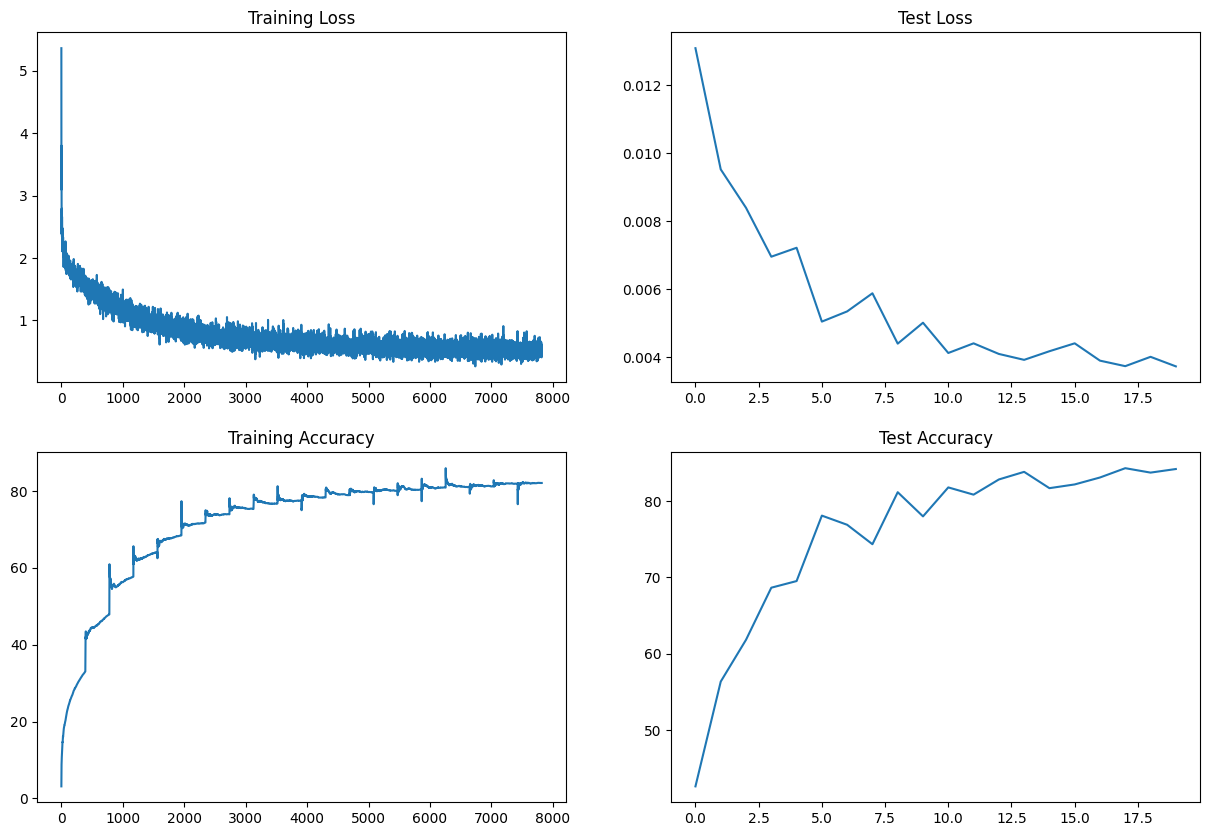

In [10]:
helpers.plot_metrics(train_acc, train_losses, test_acc, test_losses)

## Misclassified Images

Total wrong predictions are 1578


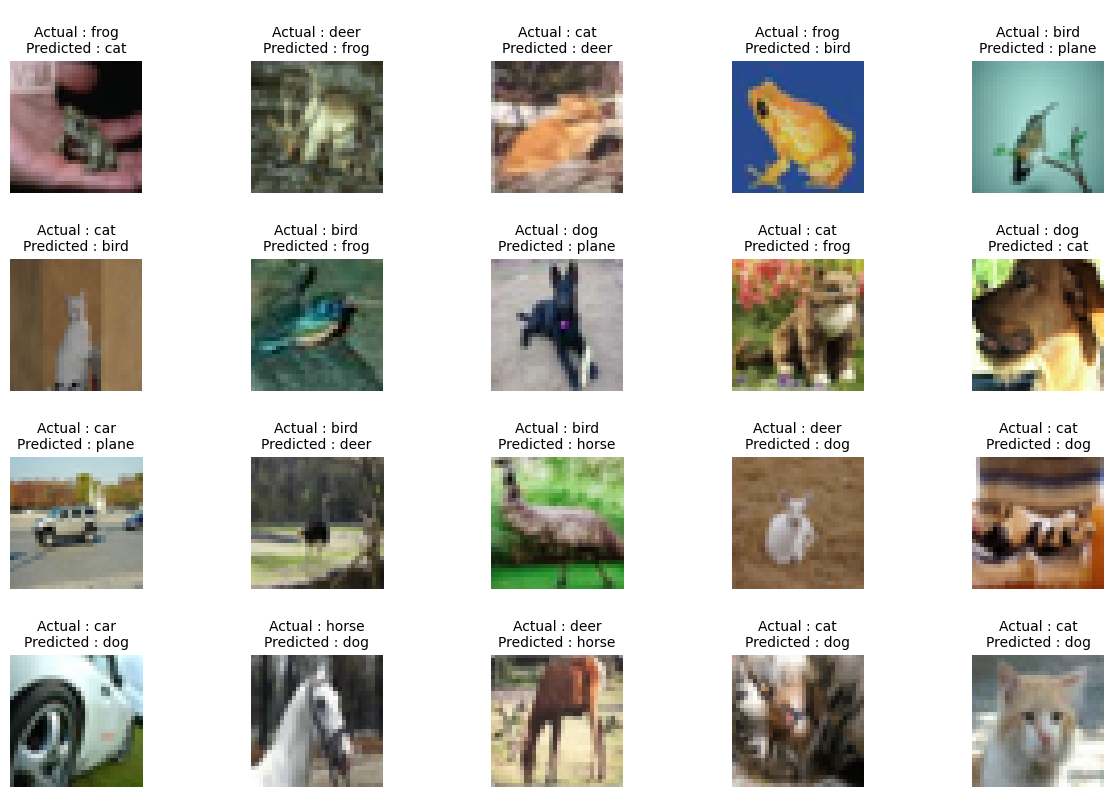

In [11]:
misclassified_images = helpers.wrong_predictions(model, testloader, device)
helpers.plot_misclassified(misclassified_images, mean, std, 20)

## Gradcam misclassified images

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1344: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


Generating Grad-CAM @layer4


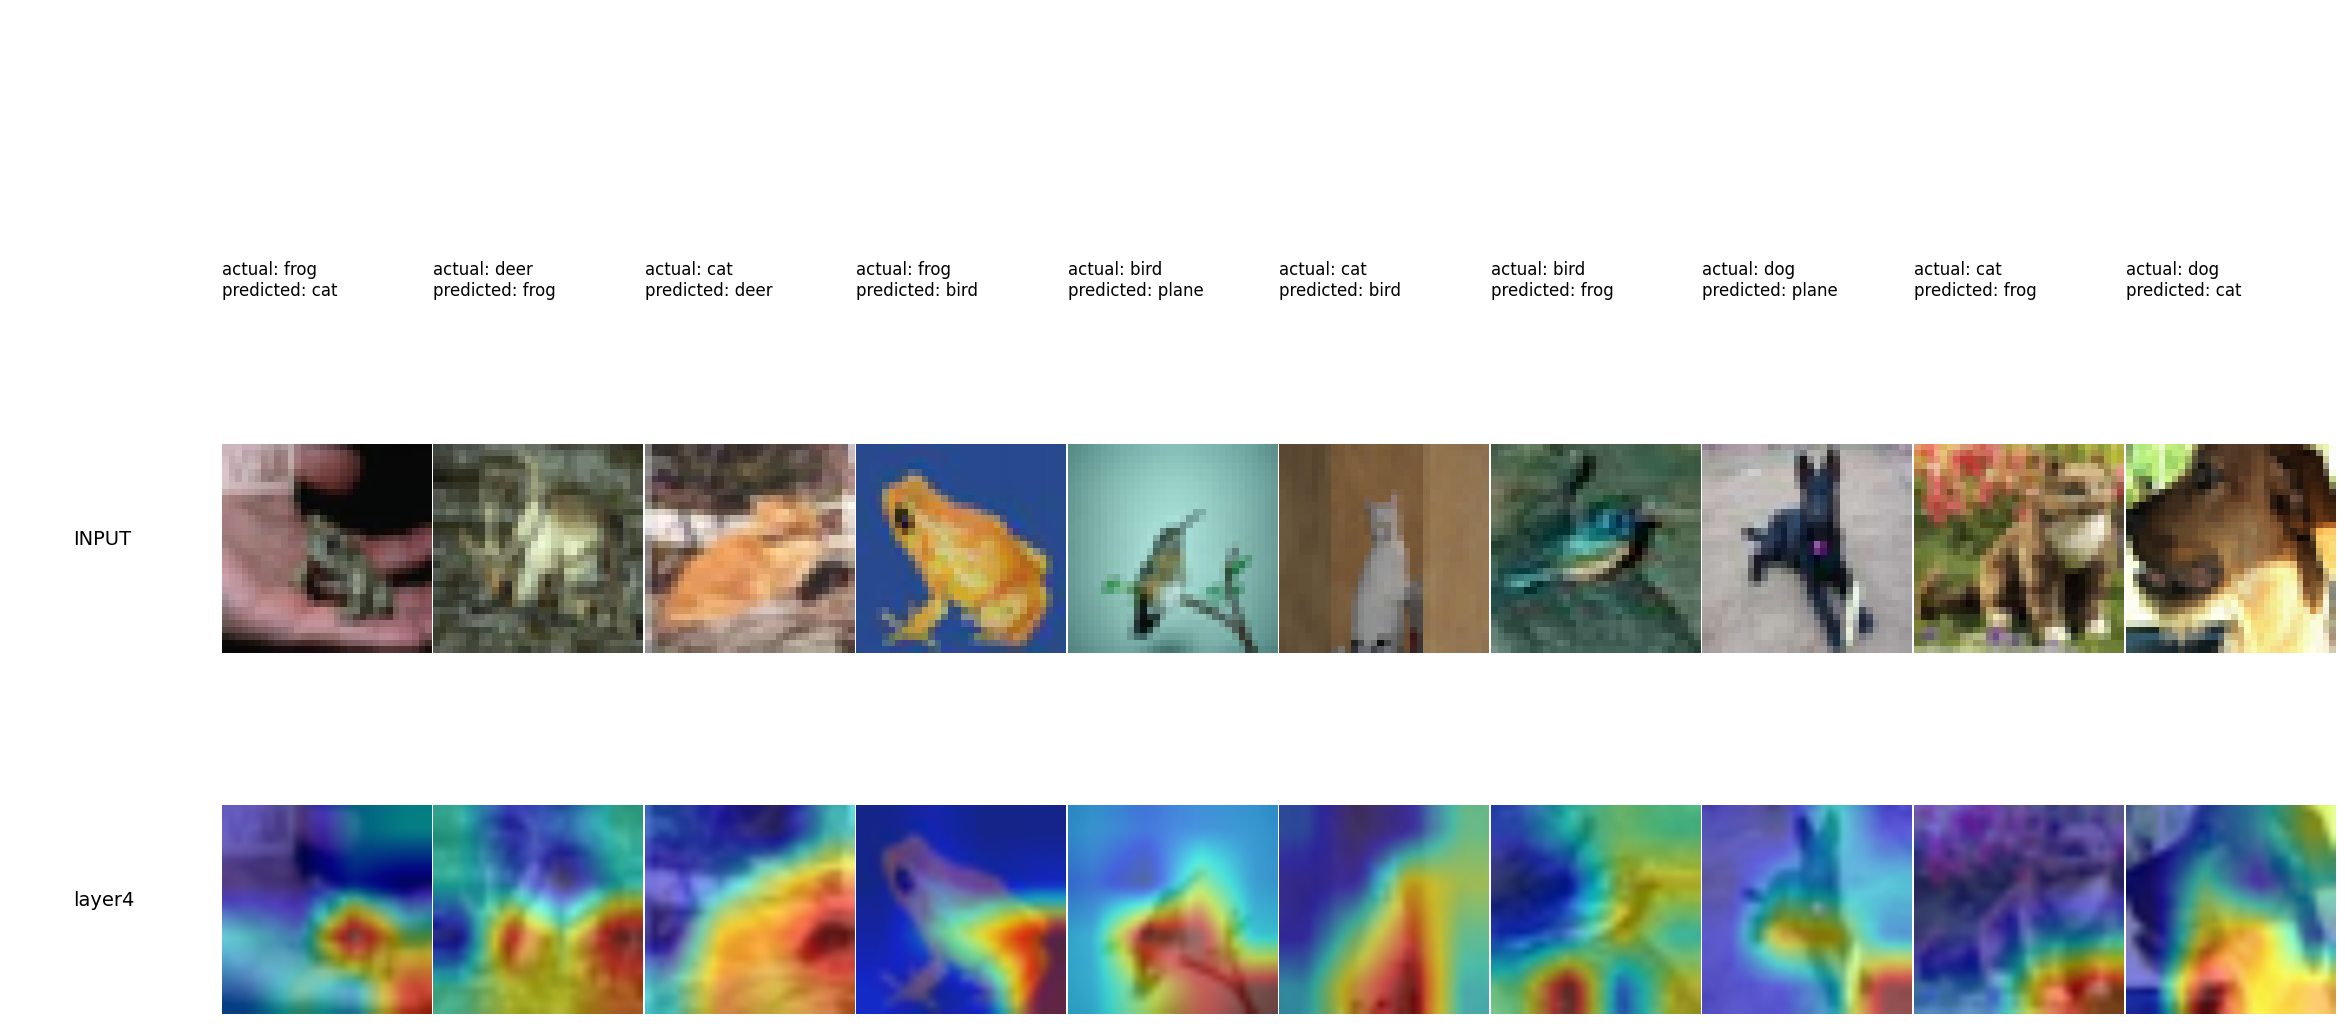

In [12]:
target_layers = ["layer4"]
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')
gradcam_output, probs, predicted_classes = gradcam.generate_gradcam(misclassified_images[:10], model, target_layers, device)
gradcam.plot_gradcam(gradcam_output, target_layers, classes, (3, 32, 32),predicted_classes, misclassified_images[:10], mean, std)

Generating Grad-CAM @layer4


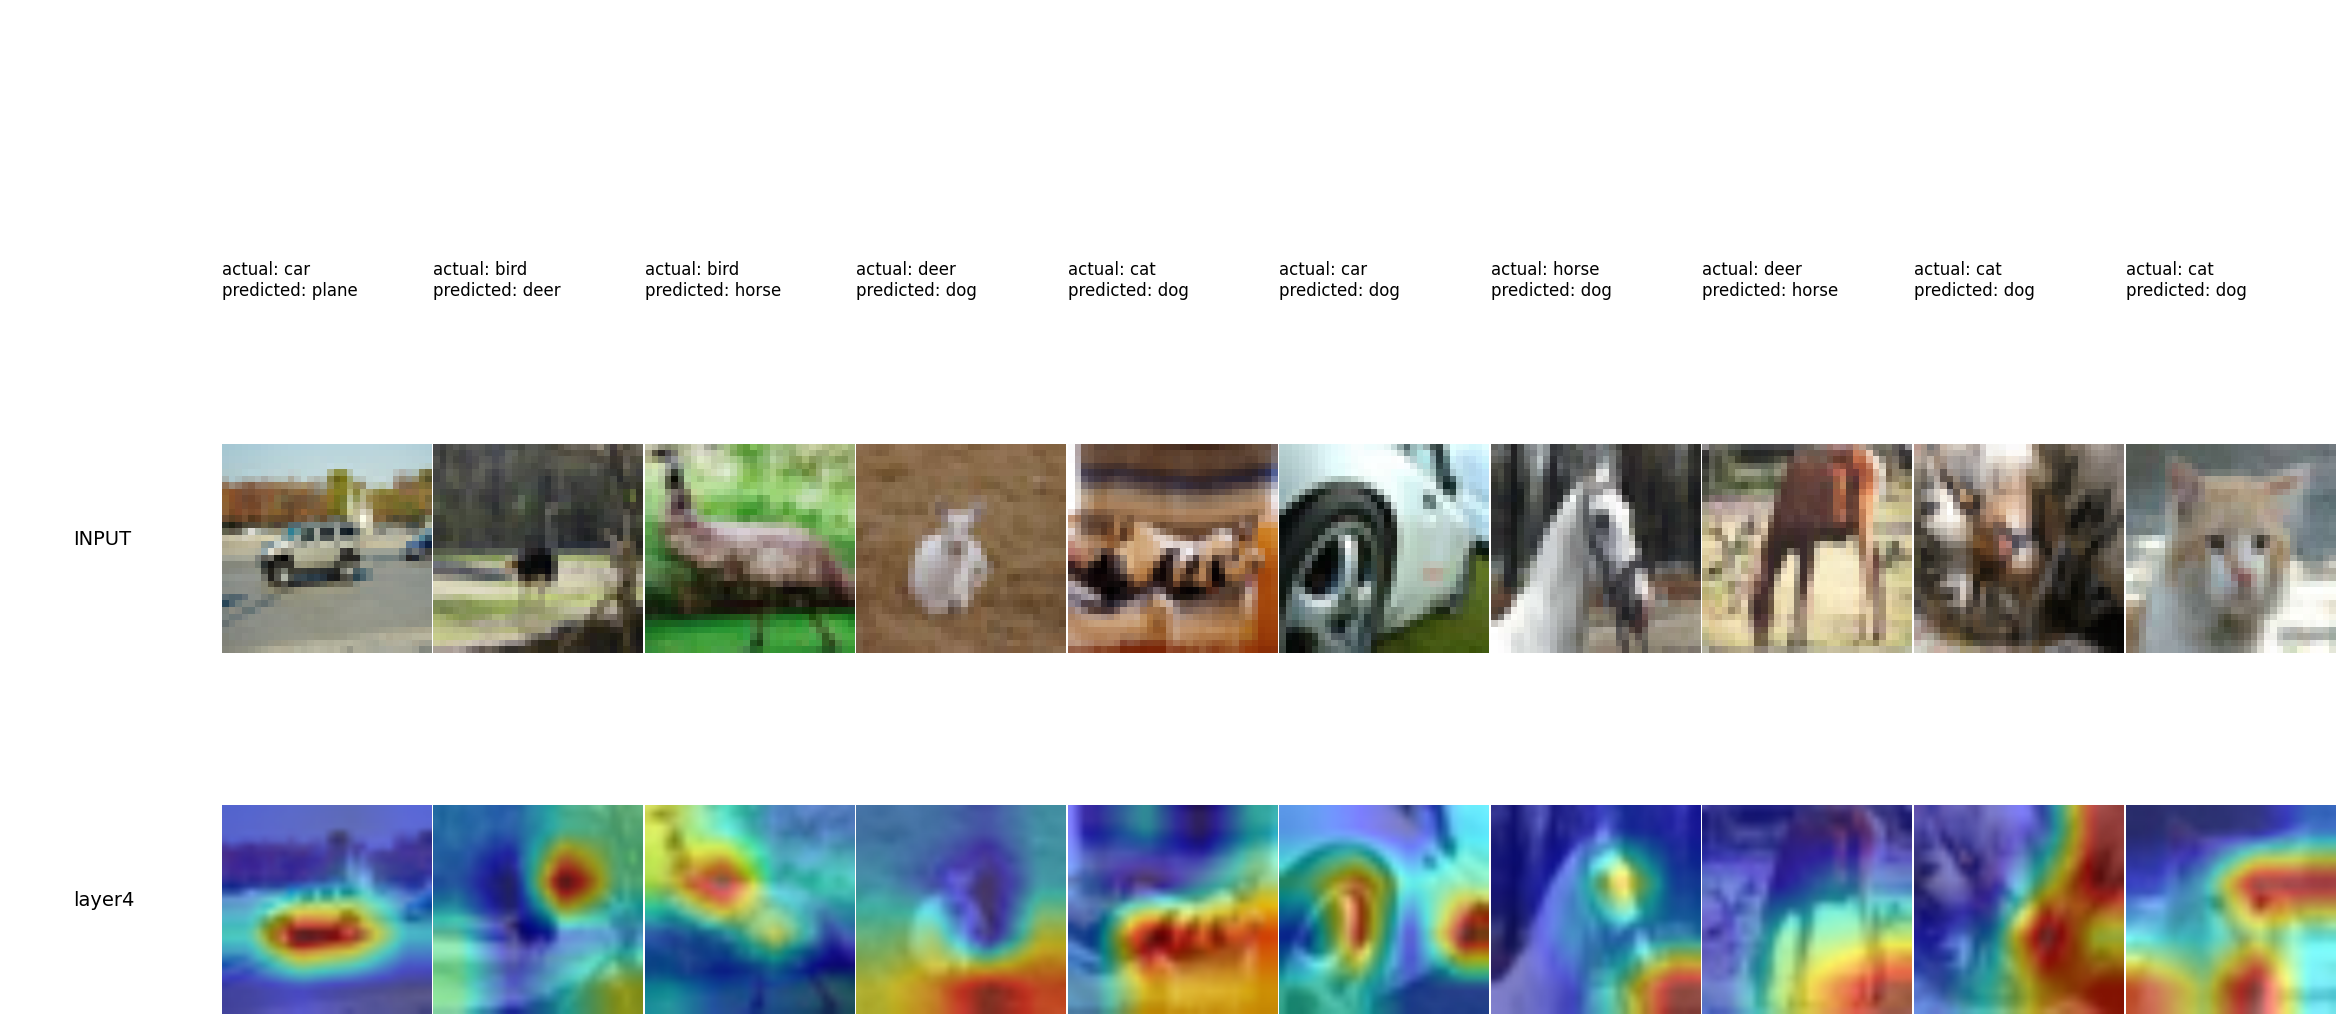

In [13]:
target_layers = ["layer4"]
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')
gradcam_output, probs, predicted_classes = gradcam.generate_gradcam(misclassified_images[10:20], model, target_layers, device)
gradcam.plot_gradcam(gradcam_output, target_layers, classes, (3, 32, 32),predicted_classes, misclassified_images[10:20], mean, std)